# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')

In [3]:
from src.serve import *

In [4]:
np.set_printoptions(edgeitems=10, threshold=40, linewidth=200)

In [5]:
data_dir = 'data/midi/v11/'
source_dir = 'midi_encode'

file_path = Path('../../')
path = file_path/data_dir/source_dir
out_path = file_path/'data/generated/'

In [6]:
# config = v10_small_config(vocab_path=path/'tmp/all'); config
config = v10_s3_config(vocab_path=path/'tmp/all'); config
config['mem_len'] = 1024
config['bptt'] = 512

In [7]:
data = load_data(path=path, cache_name='tmp/hook', **config)

In [8]:
saved_models = get_files(path/'models/s3/hook_c', recurse=True); saved_models

[PosixPath('../../data/midi/v11/midi_encode/models/s3/hook_c/1_ep16.pth'),
 PosixPath('../../data/midi/v11/midi_encode/models/s3/hook_c/1_ep24_best.pth'),
 PosixPath('../../data/midi/v11/midi_encode/models/s3/hook_c/1_ep24.pth'),
 PosixPath('../../data/midi/v11/midi_encode/models/s3/hook_c/1_ep16_best.pth')]

In [9]:
load_path = saved_models[1]

In [10]:
learn = load_learner(data, config, load_path)

Sep_idx: 1


In [11]:
# htlist = get_htlist(path, source_dir)

### From batch

In [12]:
xb,yb = learn.data.one_batch(cpu=False)

### From song

In [13]:

csv_path = path/f'{source_dir}.csv'
csv = pd.read_csv(csv_path)
df = csv.loc[csv['numpy'].notna()];

/home/ubuntu/anaconda3/envs/midi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
keywords = 'la bamba'.replace(' ', '|')
title_filter = df['title'].str.contains('canon')==True
artist_filter = df['artist'].str.contains('')==True
results = df[title_filter & artist_filter]; results.head()
results = results[results.source == 'hooktheory']; results.head()

,ht_bpm,md5,numpy,ht_time_signature,midi_title,source,artist,ht_offset,section,song_url,mxl,ht_key,parts,title,genres,midi,ht_mode
970,128.0,c1e4271a0f4a68ed4a3a9cf58a36ff4f,midi_encode/hooktheory/pianoroll/j/johann-seba...,4.0,Canon 1 a 2,hooktheory,johann-sebastian-bach,-3.0,instrumental,https://www.hooktheory.com/theorytab/view/joha...,NaN,C,instrumental,canon-1-a-2,Classical,midi_sources/hooktheory/pianoroll/j/johann-seb...,6.0
1491,132.0,3c6944b6a2dd648b6c7c8a5f2b0b3c5f,midi_encode/hooktheory/pianoroll/j/johann-pach...,4.0,Canon Prechorus,hooktheory,johann-pachelbel,-2.0,pre-chorus,https://www.hooktheory.com/theorytab/view/joha...,NaN,D,"intro,pre-chorus,chorus",canon-in-d-major,NaN,midi_sources/hooktheory/pianoroll/j/johann-pac...,1.0
1492,138.0,ba9c087d394b5f5f00402fbb8a265834,midi_encode/hooktheory/pianoroll/j/johann-pach...,4.0,Pachelbel Canon Chorus,hooktheory,johann-pachelbel,-2.0,chorus,https://www.hooktheory.com/theorytab/view/joha...,NaN,D,"intro,pre-chorus,chorus",canon-in-d-major,NaN,midi_sources/hooktheory/pianoroll/j/johann-pac...,1.0
1493,130.0,9fe819012e091691cb0636484dc9609b,midi_encode/hooktheory/pianoroll/j/johann-pach...,4.0,Pachelbel Canon in D,hooktheory,johann-pachelbel,-2.0,intro,https://www.hooktheory.com/theorytab/view/joha...,NaN,D,"intro,pre-chorus,chorus",canon-in-d-major,NaN,midi_sources/hooktheory/pianoroll/j/johann-pac...,1.0


In [15]:
keywords = 'la bamba'.replace(' ', '|')
title_filter = df['title'].str.contains('La La Land')==True
artist_filter = df['artist'].str.contains('')==True
results = df[title_filter & artist_filter]; results.head()
results = results[results.source == 'musescore']; results

,ht_bpm,md5,numpy,ht_time_signature,midi_title,source,artist,ht_offset,section,song_url,mxl,ht_key,parts,title,genres,midi,ht_mode
50905,NaN,8afbcbf47a4188edb790b0b06b9371b9,midi_encode/musescore/data/4697126.npy,NaN,NaN,musescore,Fr2525,NaN,NaN,NaN,midi_sources/musescore/data/4697126.mxl,NaN,NaN,La La Land Epilogue,"classical,pop,inferred",NaN,NaN
51893,NaN,06b6f129e47b29e606be910f708ca5aa,midi_encode/musescore/data/4345796.npy,NaN,NaN,musescore,Brennay,NaN,NaN,NaN,midi_sources/musescore/data/4345796.mxl,NaN,NaN,La La Land - City of Stars,"classical,pop,inferred",NaN,NaN
54041,NaN,9edeef985edb364d60118ecd7a56b414,midi_encode/musescore/data/4329596.npy,NaN,NaN,musescore,rossisawesome915,NaN,NaN,NaN,midi_sources/musescore/data/4329596.mxl,NaN,NaN,La La Land Epilogue,"classical,pop,inferred",NaN,NaN
54514,NaN,5ad53a5c5f513d761e629a0116735bbc,midi_encode/musescore/data/4680801.npy,NaN,NaN,musescore,calvinbranson,NaN,NaN,NaN,midi_sources/musescore/data/4680801.mxl,NaN,NaN,Mia & Sebastian's Theme (La La Land),"classical,pop,inferred",NaN,NaN
55115,NaN,28bb24de053620da1d6b7aaf445ff260,midi_encode/musescore/data/3768466.npy,NaN,NaN,musescore,MiguelBantugan,NaN,NaN,NaN,midi_sources/musescore/data/3768466.mxl,NaN,NaN,La La Land with violin,"classical,pop,inferred",NaN,NaN
55123,NaN,ca210ae46899f6d6101a28ad652a32a3,midi_encode/musescore/data/4679591.npy,NaN,NaN,musescore,Georgia Corrin,NaN,NaN,NaN,midi_sources/musescore/data/4679591.mxl,NaN,NaN,La La Land - Epilogue (piano arrangement),"classical,pop,inferred",NaN,NaN
55779,NaN,c657cee7f48053d6585e5392c0e8fed5,midi_encode/musescore/data/4912156.npy,NaN,NaN,musescore,Ignacio Hernández 2,NaN,NaN,NaN,midi_sources/musescore/data/4912156.mxl,NaN,NaN,"City of Stars (from ""La La Land"")","classical,pop,inferred",NaN,NaN
56064,NaN,81314baa7be7be96b40ed6f930d17730,midi_encode/musescore/data/4352976.npy,NaN,NaN,musescore,Brennay,NaN,NaN,NaN,midi_sources/musescore/data/4352976.mxl,NaN,NaN,La La Land - Epilogue,"classical,pop,inferred",NaN,NaN
56615,NaN,dc0fed10a0c5000ce31f88d48e8ce6ef,midi_encode/musescore/data/4367056.npy,NaN,NaN,musescore,AwkwardShadows,NaN,NaN,NaN,midi_sources/musescore/data/4367056.mxl,NaN,NaN,La La Land Mashup,"classical,pop,inferred",NaN,NaN
57949,NaN,5609218b96df61551e4b515670176638,midi_encode/musescore/data/4828922.npy,NaN,NaN,musescore,RonaldL,NaN,NaN,NaN,midi_sources/musescore/data/4828922.mxl,NaN,NaN,La La Land - It's Over/Engagement Party,"classical,pop,inferred",NaN,NaN


In [16]:
idx = 1
file = file_path/data_dir/results.numpy.values[idx]; 
orig = file_path/data_dir/results.mxl.values[idx];
# orig = file_path/data_dir/results.midi.values[idx];
file, orig

(PosixPath('../../data/midi/v11/midi_encode/musescore/data/4345796.npy'),
 PosixPath('../../data/midi/v11/midi_sources/musescore/data/4345796.mxl'))

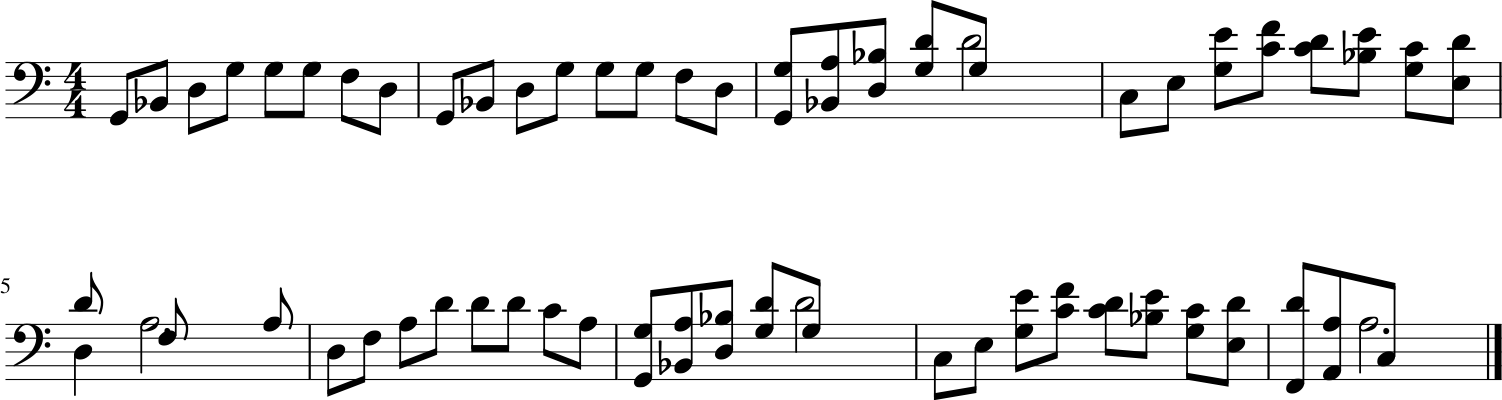

In [57]:
seed_stream = npenc2stream(seed_np)
seed_stream.show()

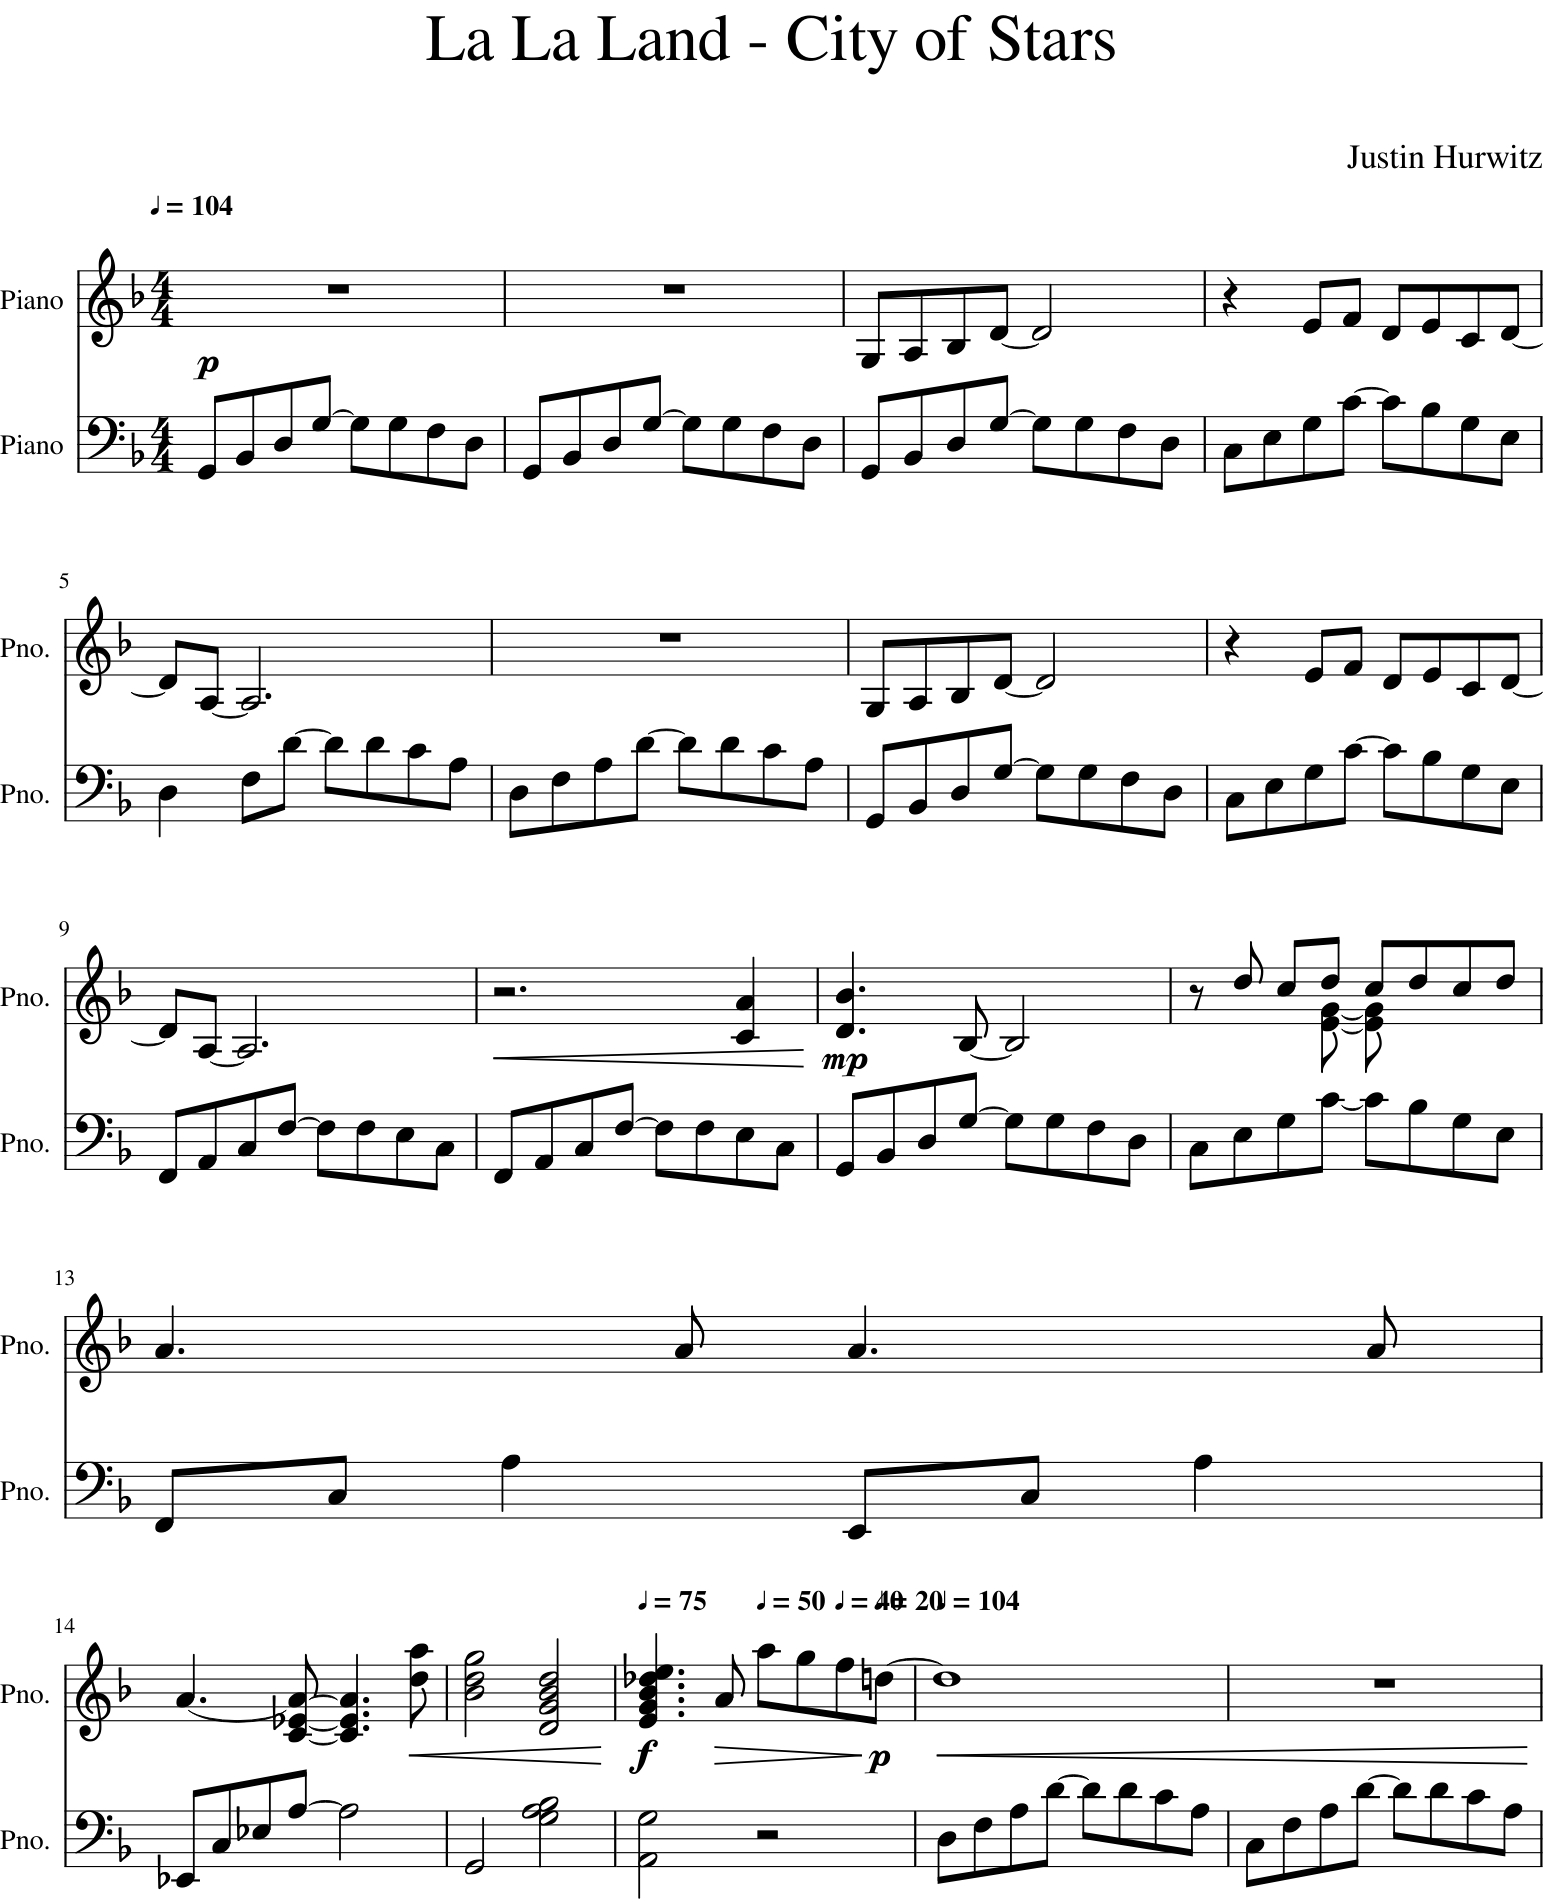

In [17]:
file2stream(orig).show()

In [18]:
file2stream(orig).show('midi')

In [44]:
carr = stream2chordarr(o)

In [47]:
outstream = chordarr2stream(carr)

In [49]:
outstream.show('midi')

In [45]:
outstr = npenc2stream(carr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# FJDKSLFJS

In [20]:
o = file2stream(orig)

In [21]:
o.show('text')

{0.0} <music21.text.TextBox "La La Land...">
{0.0} <music21.text.TextBox "Justin Hur...">
{0.0} <music21.metadata.Metadata object at 0x7f6b38ff8c50>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark Quarter=104.0>
        {0.0} <music21.key.KeySignature of 1 flat>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.dynamics.Dynamic p >
        {0.0} <music21.note.Rest rest>
    {0.0} <music21.spanner.Crescendo <music21.note.Rest rest><music21.chord.Chord C4 A4>>
    {0.0} <music21.spanner.Crescendo <music21.chord.Chord D5 A5><music21.chord.Chord D4 G4 B-4 D5>>
    {0.0} <music21.spanner.Diminuendo <music21.note.Note A><music21.note.Note F>>
    {0.0} <music21.spanner.Crescendo <music21.note.Note D><music21.note.Rest rest>>
    {0.0} <music21.sp

In [43]:
o.flat.stripTies().show('text')

{0.0} <music21.note.Rest rest>
{0.0} <music21.note.Note G>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note G>
{2.5} <music21.note.Note G>
{3.0} <music21.note.Note F>
{3.5} <music21.note.Note D>
{4.0} <music21.note.Rest rest>
{4.0} <music21.note.Note G>
{4.5} <music21.note.Note B->
{5.0} <music21.note.Note D>
{5.5} <music21.note.Note G>
{6.5} <music21.note.Note G>
{7.0} <music21.note.Note F>
{7.5} <music21.note.Note D>
{8.0} <music21.note.Note G>
{8.0} <music21.note.Note G>
{8.5} <music21.note.Note A>
{8.5} <music21.note.Note B->
{9.0} <music21.note.Note B->
{9.0} <music21.note.Note D>
{9.5} <music21.note.Note D>
{10.0} <music21.note.Note G>
{10.5} <music21.note.Note G>
{11.0} <music21.note.Note F>
{11.5} <music21.note.Note D>
{12.0} <music21.note.Rest rest>
{12.0} <music21.note.Note C>
{12.5} <music21.note.Note E>
{13.0} <music21.note.Note E>
{13.0} <music21.note.Note G>
{13.5} <music21.note.Note F>
{13.5} <music21.note.Note C>
{14.0} <music21.note.Not

In [32]:
o.parts[1].flat.show('text')

{0.0} <music21.instrument.Instrument P1: Piano: Piano>
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.layout.StaffLayout distance 65, staffNumber 2, staffSize None, staffLines None>
{0.0} <music21.clef.BassClef>
{0.0} <music21.key.KeySignature of 1 flat>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note G>
{0.0} <music21.spanner.Crescendo <music21.note.Rest rest><music21.chord.Chord C4 A4>>
{0.0} <music21.spanner.Crescendo <music21.chord.Chord D5 A5><music21.chord.Chord D4 G4 B-4 D5>>
{0.0} <music21.spanner.Diminuendo <music21.note.Note A><music21.note.Note F>>
{0.0} <music21.spanner.Crescendo <music21.note.Note D><music21.note.Rest rest>>
{0.0} <music21.spanner.Crescendo <music21.chord.Chord B-4 D5 G5><music21.note.Rest rest>>
{0.0} <music21.spanner.Diminuendo <music21.chord.Chord E5 G5 B-5 C6 E6><music21.chord.Chord A4 A5>>
{0.0} <music21.spanner.Crescendo <music21.note.Note A><music21.note.Note F>>
{0.0} <music21.spanner.Crescendo <music21.note.Note A><music21.not

In [31]:
m1 = o.parts[1][1]; m1.show('text')

{0.0} <music21.layout.SystemLayout>
{0.0} <music21.layout.StaffLayout distance 65, staffNumber 2, staffSize None, staffLines None>
{0.0} <music21.clef.BassClef>
{0.0} <music21.key.KeySignature of 1 flat>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note G>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note G>
{2.0} <music21.note.Note G>
{2.5} <music21.note.Note G>
{3.0} <music21.note.Note F>
{3.5} <music21.note.Note D>


In [36]:
n = m1[-4]

In [42]:
o.stripTies().show('text')

{0.0} <music21.text.TextBox "La La Land...">
{0.0} <music21.text.TextBox "Justin Hur...">
{0.0} <music21.metadata.Metadata object at 0x7f6b37826080>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark Quarter=104.0>
        {0.0} <music21.key.KeySignature of 1 flat>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.dynamics.Dynamic p >
        {0.0} <music21.note.Rest rest>
    {0.0} <music21.spanner.Crescendo <music21.note.Rest rest><music21.chord.Chord C4 A4>>
    {0.0} <music21.spanner.Crescendo <music21.chord.Chord D5 A5><music21.chord.Chord D4 G4 B-4 D5>>
    {0.0} <music21.spanner.Diminuendo <music21.note.Note A><music21.note.Note F>>
    {0.0} <music21.spanner.Crescendo <music21.note.Note D><music21.note.Rest rest>>
    {0.0} <music21.sp

In [41]:
o.parts[1].stripTies().show('text')

{0.0} <music21.note.Note G>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note G>
{2.5} <music21.note.Note G>
{3.0} <music21.note.Note F>
{3.5} <music21.note.Note D>
{4.0} <music21.note.Note G>
{4.5} <music21.note.Note B->
{5.0} <music21.note.Note D>
{5.5} <music21.note.Note G>
{6.5} <music21.note.Note G>
{7.0} <music21.note.Note F>
{7.5} <music21.note.Note D>
{8.0} <music21.note.Note G>
{8.5} <music21.note.Note B->
{9.0} <music21.note.Note D>
{9.5} <music21.note.Note G>
{10.5} <music21.note.Note G>
{11.0} <music21.note.Note F>
{11.5} <music21.note.Note D>
{12.0} <music21.note.Note C>
{12.5} <music21.note.Note E>
{13.0} <music21.note.Note G>
{13.5} <music21.note.Note C>
{14.5} <music21.note.Note B->
{15.0} <music21.note.Note G>
{15.5} <music21.note.Note E>
{16.0} <music21.note.Note D>
{17.0} <music21.note.Note F>
{17.5} <music21.note.Note D>
{18.5} <music21.note.Note D>
{19.0} <music21.note.Note C>
{19.5} <music21.note.Note A>
{20.0} <music21.note.Note D>

In [40]:
m1.stripTies().show('text')

{0.0} <music21.note.Note G>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note G>
{2.5} <music21.note.Note G>
{3.0} <music21.note.Note F>
{3.5} <music21.note.Note D>


### Predict

In [27]:
# res1 = torch.randint(0, 1000, (10,10)).float(); res1

# res2 = res1.pow(1 / 10)
# res2 = res2 / res2.sum()
# (res2*1000).round()/1000

# resd5 = res1.pow(1 / .5)
# resd5_prob = resd5 / resd5.sum()
# (resd5_prob*1000).round()/1000

In [28]:
# out, seed = learn.predict(xb, n_words=340, temperature=1, min_p=0.01)

In [29]:
# Higher temperature = More randomness (1.5)
# Lower temperature = Less random (.5)

## Learn predict

In [59]:
out_s, seed_s = learn.predict(xb, n_words=800, temperatures=(1.0,.5), min_ps=(1/128,0.0))
out = to_double_stream(out_s)
seed = to_double_stream(seed_s)

Bars 13 0
Bars 3 1
Bars 3 1
Bars 3 1
Bars 3 1
Bars 3 1
Bars 3 1
Bars 3 2
Bars 3 2
Bars 3 2
Bars 3 2
Bars 3 2
Bars 3 3
Bars 9 3
Bars 3 3
Bars 3 4
Bars 3 4
Bars 3 4
Bars 3 4
Bars 3 4
Bars 3 4
Bars 3 5
Bars 3 5
Bars 3 5
Bars 13 6
Bars 3 6
Bars 3 6
Bars 3 6
Bars 3 7
Bars 3 7
Bars 3 7
Bars 3 7
Bars 3 7
Bars 3 8
Bars 3 8
Bars 3 8
Bars 3 8
Bars 9 9
Bars 3 9
Bars 3 9
Bars 3 9
Bars 3 9
Bars 3 10
Bars 3 10
Bars 3 10
Bars 3 10
Bars 3 10
Bars 3 11
Bars 13 11
Bars 3 12
Bars 3 12
Bars 3 12
Bars 3 12
Bars 3 12
Bars 3 12
Bars 3 13
Bars 3 13
Bars 3 13
Bars 3 13
Bars 3 13
Bars 3 14
Bars 9 14
Bars 3 14
Bars 3 15
Bars 3 15
Bars 3 15
Bars 9 15
Bars 3 16
Bars 3 16
Bars 3 16
Bars 3 16
Bars 9 17
Bars 3 17
Bars 3 17
Bars 3 17
Bars 3 18
Bars 9 18
Bars 3 18
Bars 3 18
Bars 3 19
Bars 3 19
Bars 9 19
Bars 3 20
Bars 3 20
Bars 3 20
Bars 3 20
Bars 9 21
Bars 3 21
Bars 3 21
Bars 3 21
Bars 3 21
Bars 9 22
Bars 3 22
Bars 3 22
Bars 3 23
Bars 3 23
Bars 9 23
Bars 3 24
Bars 3 24
Bars 3 24
Bars 3 24
Bars 9 25
Bars 3 25
Bars 3 25

### Actual prediction

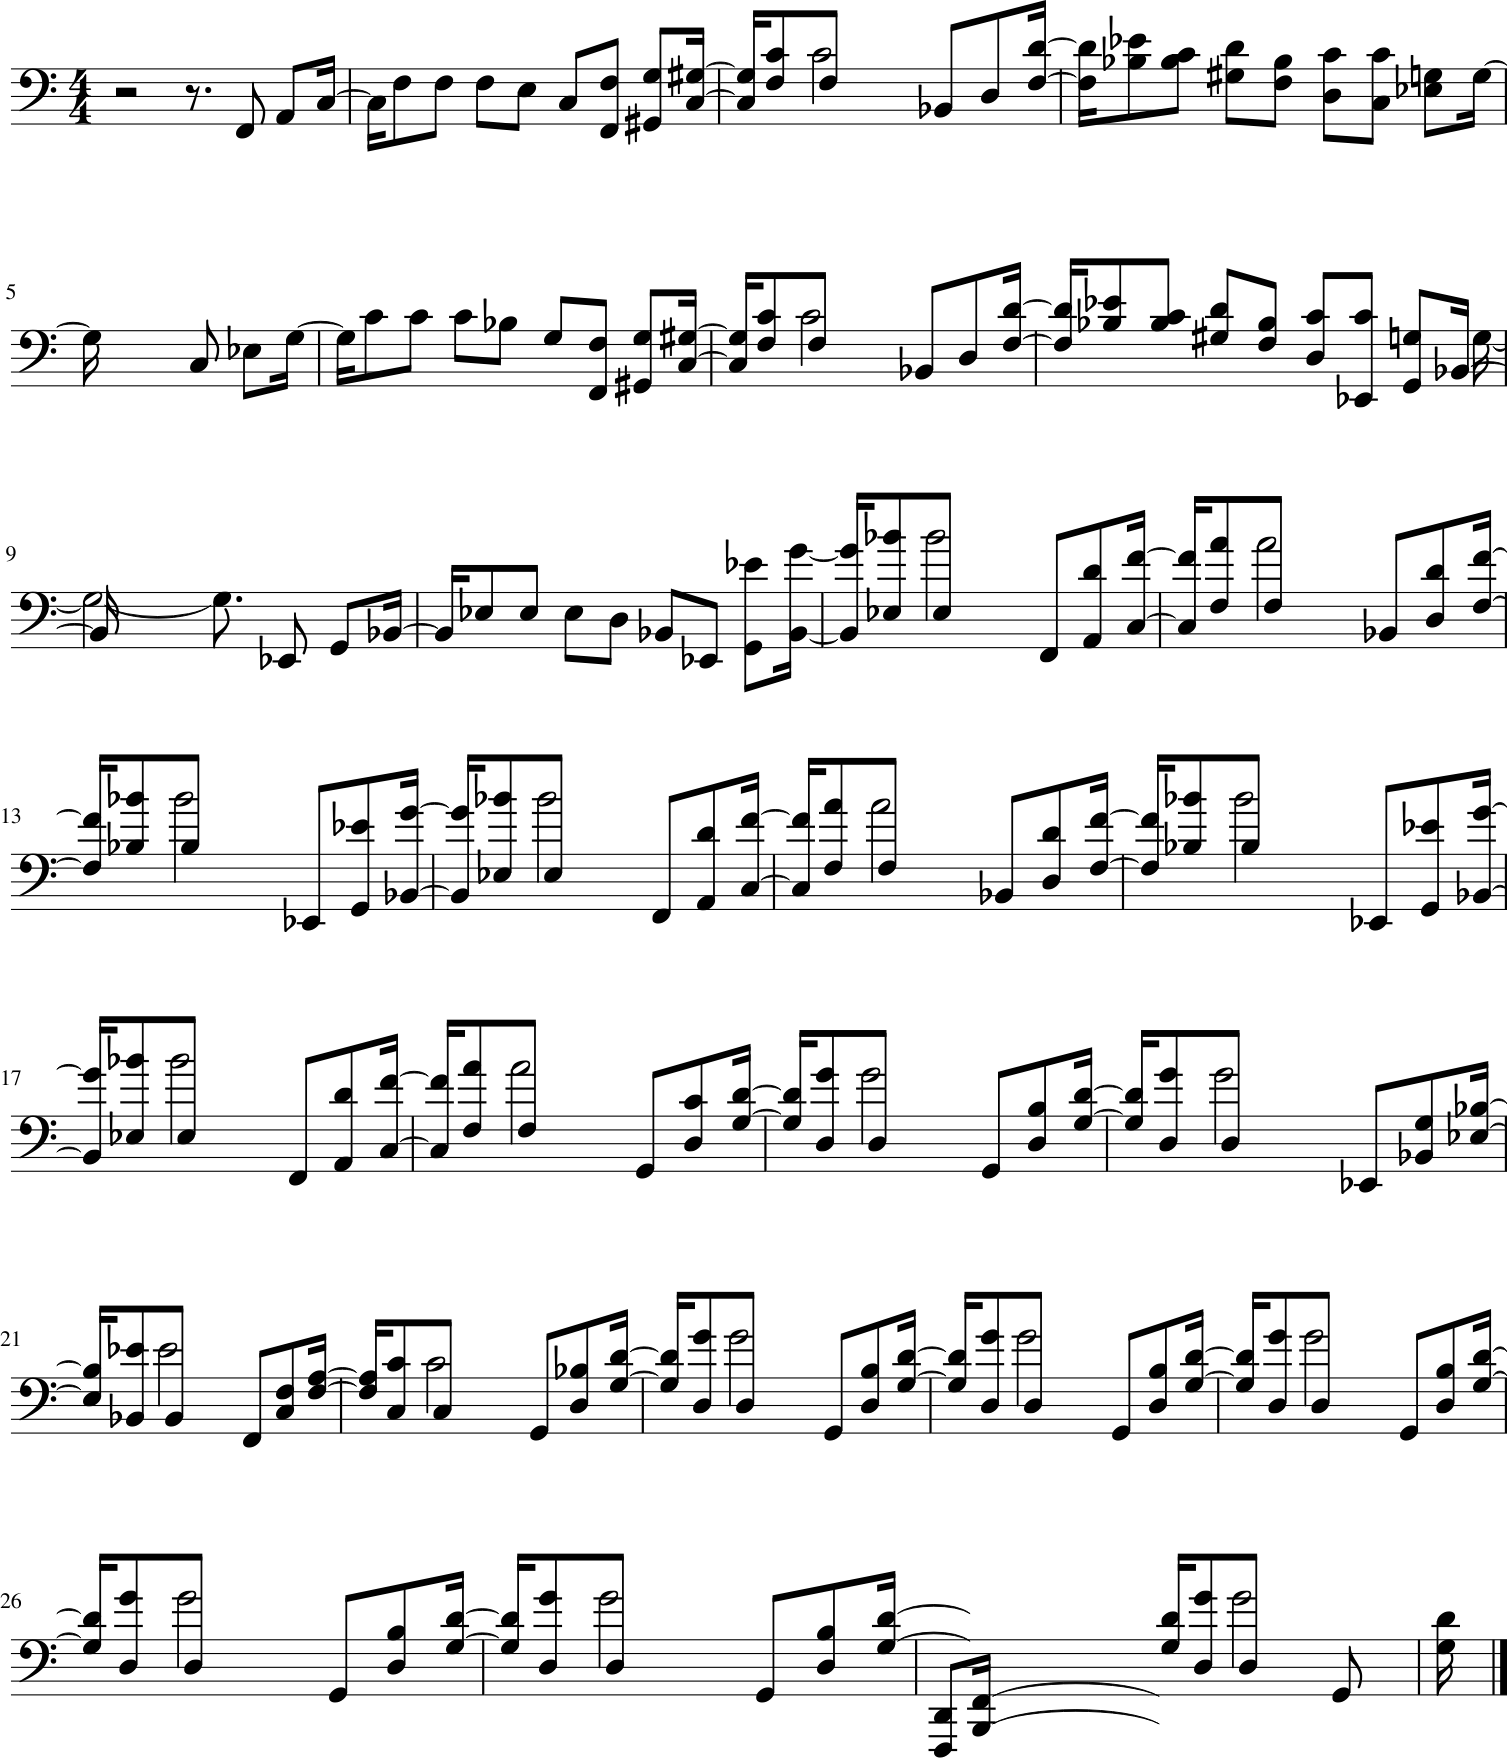

In [60]:
stream = npenc2stream(out)
stream.show()

In [61]:
stream.show('midi')

## Seed

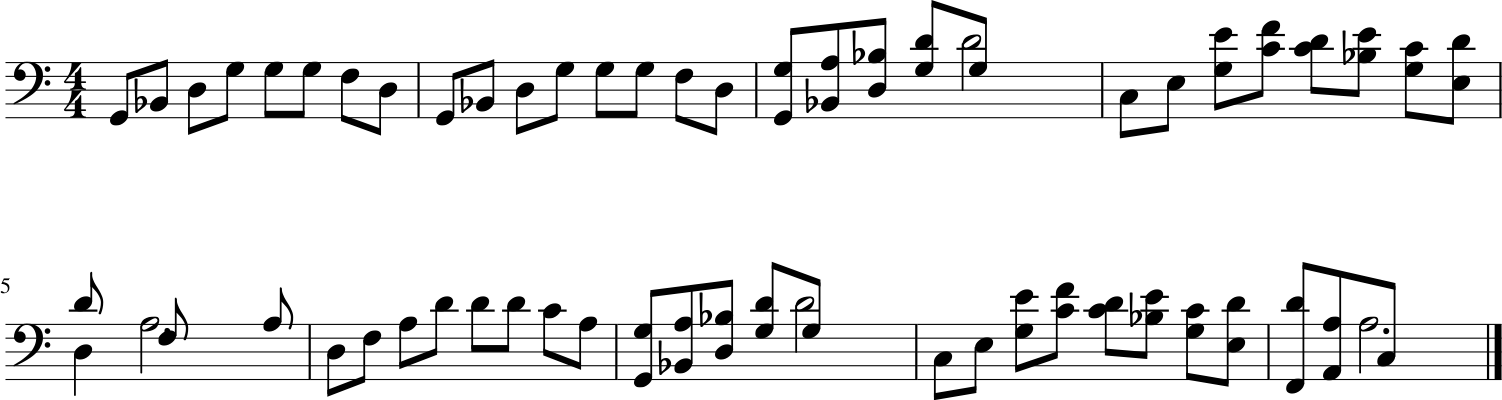

In [62]:
seed_stream = npenc2stream(seed)
seed_stream.show()

In [63]:
seed_stream.show('midi')

## Alltogether now

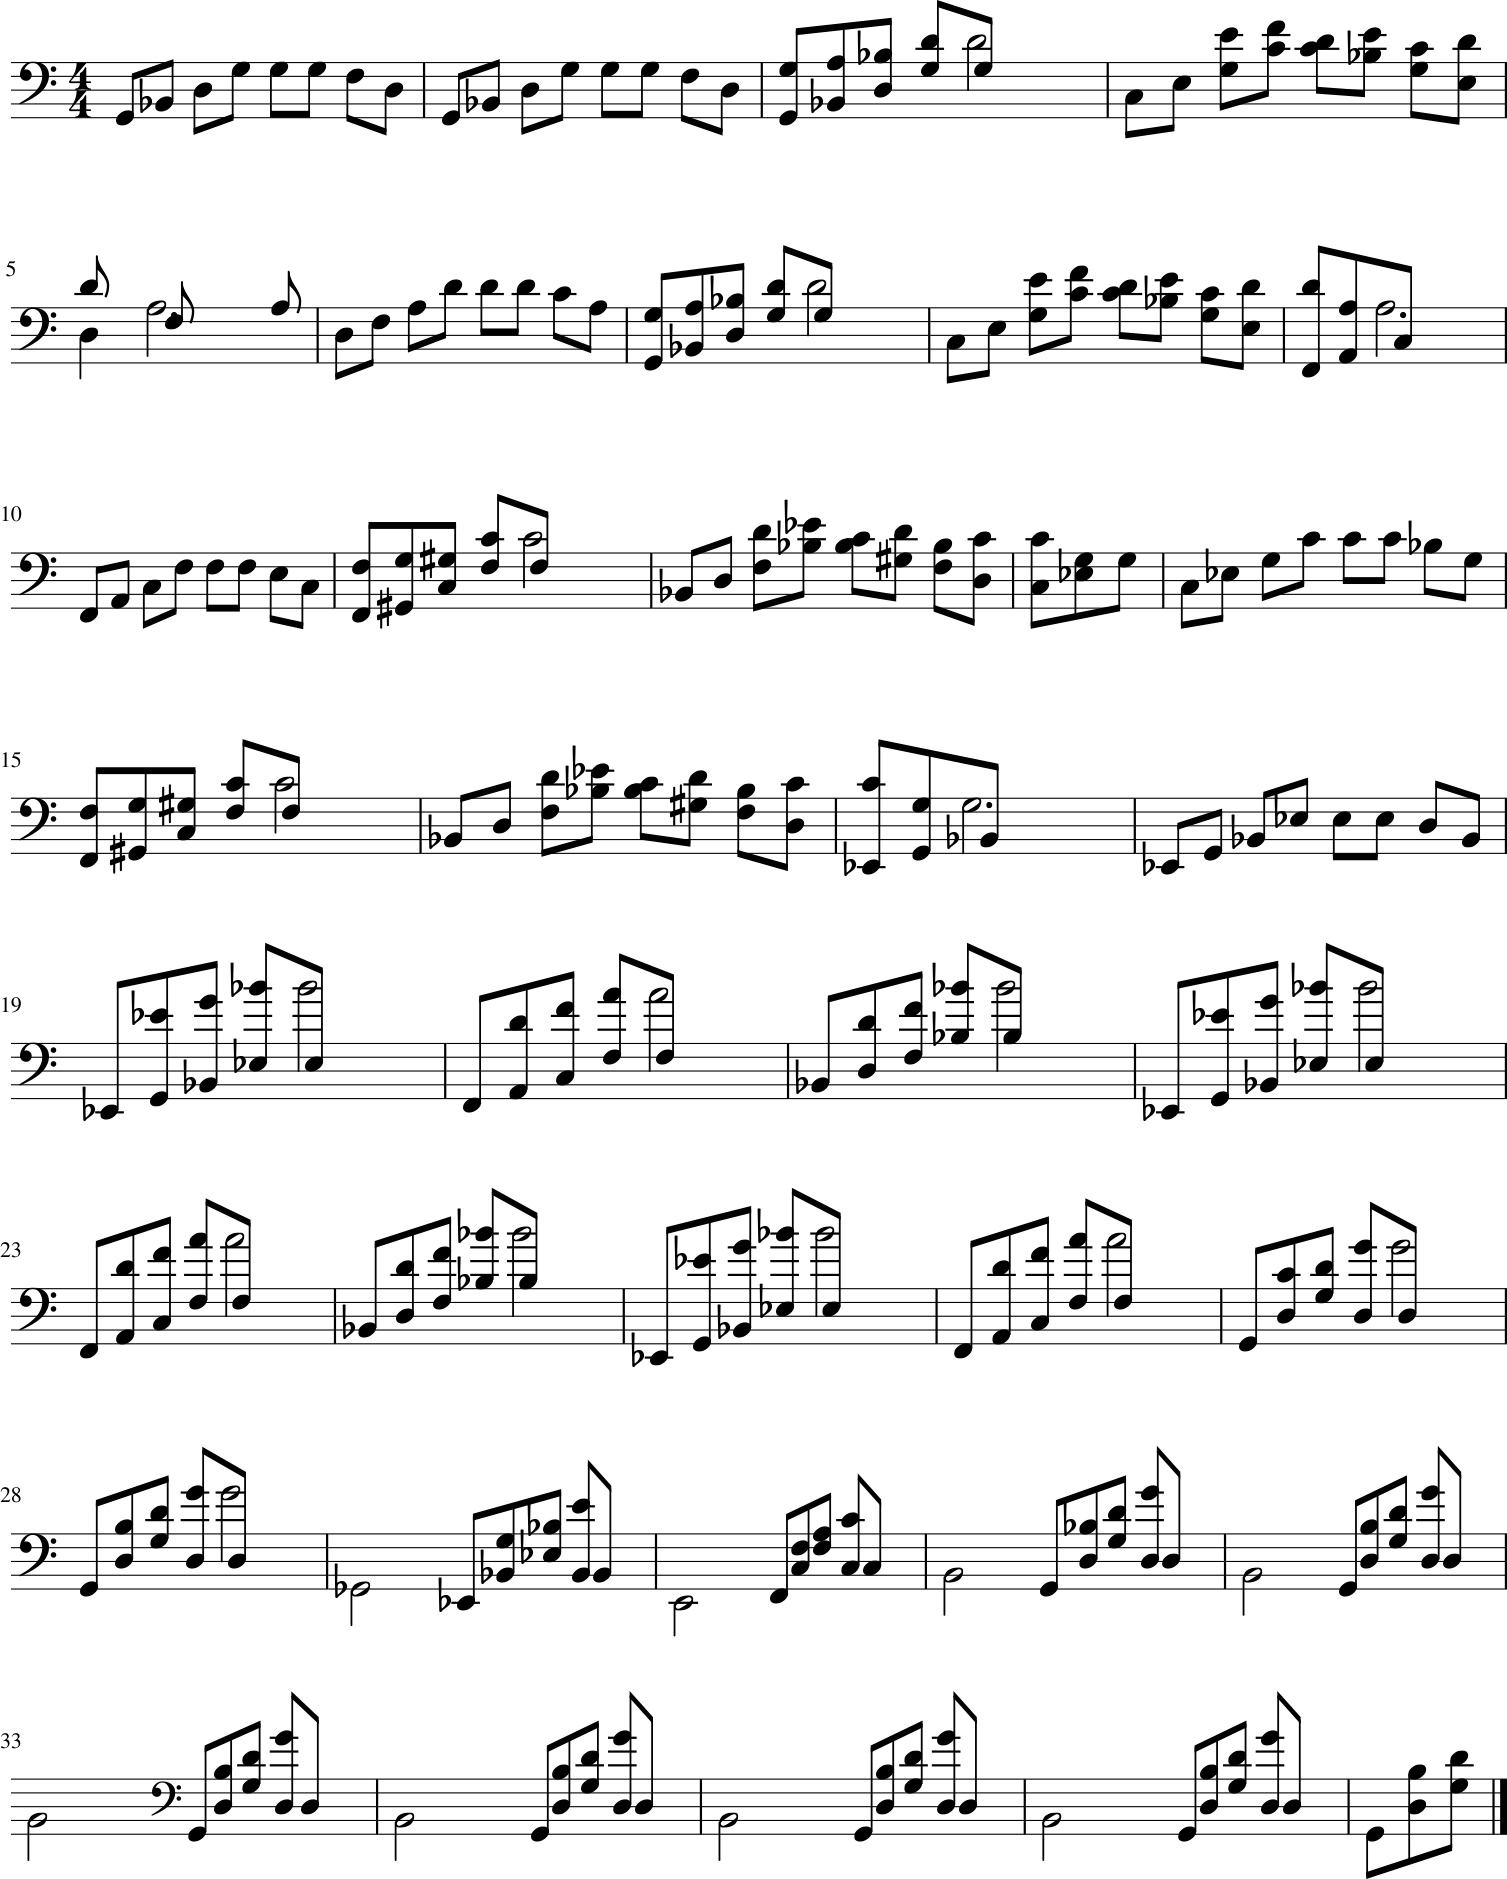

In [64]:
full_output = np.concatenate((seed,out), axis=0)
full_stream = npenc2stream(full_output)
full_stream.show()

In [65]:
full_stream.show('midi')

### Original

In [68]:
original_stream = npenc2stream(song_np)
original_stream.show()

SubConverterFileIOException: png file of xml not found. Or file >999 pages?

In [69]:
original_stream.show('midi')